In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Load race details
races = pd.read_csv('races.csv')

# Load individual lap times per driver per race
lap_times = pd.read_csv('lap_times.csv')

# Load full driver information
drivers = pd.read_csv('drivers.csv')

# Load constructor (team) details
constructors = pd.read_csv('constructors.csv')

# Load the results of each race
results = pd.read_csv('results.csv')

# Load pit stop times and laps
pit_stops = pd.read_csv('pit_stops.csv')

# Load qualifying session details
qualifying = pd.read_csv('qualifying.csv')

# Load driver standings (after each race)
driver_standings = pd.read_csv('driver_standings.csv')

# Load team (constructor) standings by race
constructor_standings = pd.read_csv('constructor_standings.csv')

# Load circuits (track info)
circuits = pd.read_csv('circuits.csv')

# Load status codes (e.g., finished, accident, DNF)
status = pd.read_csv('status.csv')


In [3]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [4]:
# Example: merge lap_times with results and races for richer context
df = lap_times.merge(results, on=['raceId', 'driverId'], how='left')
df = df.merge(races, on='raceId', how='left')

In [5]:
df

,raceId,driverId,lap,position_x,time_x,milliseconds_x,resultId,constructorId,number,grid,...,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,841,20,1,1,1:38.109,98109,20779,9,1,1,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,841,20,2,1,1:33.006,93006,20779,9,1,1,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,841,20,3,1,1:32.713,92713,20779,9,1,1,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,841,20,4,1,1:32.803,92803,20779,9,1,1,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,841,20,5,1,1:32.342,92342,20779,9,1,1,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589076,1144,857,54,10,1:27.731,87731,26754,1,81,2,...,2024-12-06,09:30:00,2024-12-06,13:00:00,2024-12-07,10:30:00,2024-12-07,14:00:00,\N,\N
589077,1144,857,55,10,1:27.781,87781,26754,1,81,2,...,2024-12-06,09:30:00,2024-12-06,13:00:00,2024-12-07,10:30:00,2024-12-07,14:00:00,\N,\N
589078,1144,857,56,10,1:27.816,87816,26754,1,81,2,...,2024-12-06,09:30:00,2024-12-06,13:00:00,2024-12-07,10:30:00,2024-12-07,14:00:00,\N,\N
589079,1144,857,57,10,1:28.554,88554,26754,1,81,2,...,2024-12-06,09:30:00,2024-12-06,13:00:00,2024-12-07,10:30:00,2024-12-07,14:00:00,\N,\N


In [6]:
# Select subset of columns for features
features = ['laps', 'milliseconds_x', 'position_x', 'grid', 'points', 'year']
target = 'position_x'  # or define your own, e.g. a binary variable

In [7]:
features

['laps', 'milliseconds_x', 'position_x', 'grid', 'points', 'year']

In [8]:
target

'position_x'

In [9]:
X = df[features]
y = df[target]

In [10]:
X


,laps,milliseconds_x,position_x,grid,points,year
0,58,98109,1,1,25.0,2011
1,58,93006,1,1,25.0,2011
2,58,92713,1,1,25.0,2011
3,58,92803,1,1,25.0,2011
4,58,92342,1,1,25.0,2011
...,...,...,...,...,...,...
589076,58,87731,10,2,1.0,2024
589077,58,87781,10,2,1.0,2024
589078,58,87816,10,2,1.0,2024
589079,58,88554,10,2,1.0,2024


In [11]:
y

0          1
1          1
2          1
3          1
4          1
          ..
589076    10
589077    10
589078    10
589079    10
589080    10
Name: position_x, Length: 589081, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split first to avoid data leakage
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train[['laps', 'milliseconds_x', 'grid', 'year']])
X_val_scaled = scaler_X.transform(X_val[['laps', 'milliseconds_x', 'grid', 'year']])

# Replace scaled columns in original dataframes (optional)
X_train[['laps', 'milliseconds_x', 'grid', 'year']] = X_train_scaled
X_val[['laps', 'milliseconds_x', 'grid', 'year']] = X_val_scaled

# Scale target variable (important for regression)
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1, 1))
y_val_scaled = scaler_y.transform(np.array(y_val).reshape(-1, 1))

# Convert to tensors
X_train_tf = tf.convert_to_tensor(X_train.values, dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train_scaled, dtype=tf.float32)
X_val_tf = tf.convert_to_tensor(X_val.values, dtype=tf.float32)
y_val_tf = tf.convert_to_tensor(y_val_scaled, dtype=tf.float32)

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [15]:
X_train_tf = tf.convert_to_tensor(X_train_scaled, dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train.values, dtype=tf.float32)
X_val_tf = tf.convert_to_tensor(X_val_scaled, dtype=tf.float32)
y_val_tf = tf.convert_to_tensor(y_val.values, dtype=tf.float32)

In [16]:
import tf_keras
from tensorflow_probability import distributions as tfd

model = tf_keras.Sequential([
    tf_keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    tf_keras.layers.Dense(64, activation='relu'),
    tfp.layers.DenseFlipout(1)  # Bayesian output
])

model.compile(optimizer='adam', loss='mse')  # Use 'mse' for regression task
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

C:\Users\Diwash\anaconda3\envs\ApexhackTX\Lib\site-packages\tensorflow_probability\python\layers\util.py:99: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  loc = add_variable_fn(
C:\Users\Diwash\anaconda3\envs\ApexhackTX\Lib\site-packages\tensorflow_probability\python\layers\util.py:109: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use the `layer.add_weight()` method instead.
  untransformed_scale = add_variable_fn(
C:\Users\Diwash\anaconda3\envs\ApexhackTX\Lib\site-packages\tf_keras\src\initializers\initializers.py:121: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(



Epoch 1/30

11782/11782 [==============================] - 17s 1ms/step - loss: 7601410.0000 - val_loss: 35464.1914
Epoch 2/30
11782/11782 [==============================] - 16s 1ms/step - loss: 11886.3604 - val_loss: 160.6750
Epoch 3/30
11782/11782 [==============================] - 16s 1ms/step - loss: 129.9389 - val_loss: 98.5002
Epoch 4/30
11782/11782 [==============================] - 16s 1ms/step - loss: 47.5324 - val_loss: 30.5596
Epoch 5/30
11782/11782 [==============================] - 16s 1ms/step - loss: 30.5862 - val_loss: 30.5578
Epoch 6/30
11782/11782 [==============================] - 15s 1ms/step - loss: 30.5860 - val_loss: 30.5591
Epoch 7/30
11782/11782 [==============================] - 15s 1ms/step - loss: 30.5860 - val_loss: 30.5591
Epoch 8/30
11782/11782 [==============================] - 15s 1ms/step - loss: 30.5863 - val_loss: 30.5582
Epoch 9/30
11782/11782 [==============================] - 16s 1ms/step - loss: 30.5861 - val_loss: 30.5591
Epoch 10/30
11782/1178

In [19]:
X_val

,laps,milliseconds_x,position_x,grid,points,year
533975,56,103848,7,14,6.0,2022
296985,9,81522,19,15,0.0,2006
94167,52,104392,8,13,0.0,2015
456231,70,75428,4,6,13.0,2019
226109,30,79715,6,9,0.0,2002
...,...,...,...,...,...,...
292852,59,85133,13,13,0.0,2006
163862,61,92487,9,13,1.0,1999
210026,46,89811,11,18,0.0,2001
503264,69,85490,10,20,0.0,2021


In [20]:
X

,laps,milliseconds_x,position_x,grid,points,year
0,58,98109,1,1,25.0,2011
1,58,93006,1,1,25.0,2011
2,58,92713,1,1,25.0,2011
3,58,92803,1,1,25.0,2011
4,58,92342,1,1,25.0,2011
...,...,...,...,...,...,...
589076,58,87731,10,2,1.0,2024
589077,58,87781,10,2,1.0,2024
589078,58,87816,10,2,1.0,2024
589079,58,88554,10,2,1.0,2024


In [21]:
history = model.fit(
    X_train_tf, y_train_tf,
    epochs=30,
    batch_size=32,
    validation_data=(X_val_tf, y_val_tf),
    verbose=1
)


Epoch 1/30
14727/14727 [==============================] - 19s 1ms/step - loss: 9.0165 - val_loss: 4.5428
Epoch 2/30
14727/14727 [==============================] - 19s 1ms/step - loss: 4.4697 - val_loss: 4.4216
Epoch 3/30
14727/14727 [==============================] - 18s 1ms/step - loss: 4.4017 - val_loss: 4.4014
Epoch 4/30
14727/14727 [==============================] - 18s 1ms/step - loss: 4.3886 - val_loss: 4.3442
Epoch 5/30
14727/14727 [==============================] - 18s 1ms/step - loss: 4.3081 - val_loss: 4.2262
Epoch 6/30
14727/14727 [==============================] - 19s 1ms/step - loss: 3.9622 - val_loss: 3.3698
Epoch 7/30
14727/14727 [==============================] - 18s 1ms/step - loss: 3.1870 - val_loss: 3.1431
Epoch 8/30
14727/14727 [==============================] - 19s 1ms/step - loss: 3.1441 - val_loss: 3.1483
Epoch 9/30
14727/14727 [==============================] - 18s 1ms/step - loss: 3.1469 - val_loss: 3.1503
Epoch 10/30
14727/14727 [==============================

In [22]:
#Prediction
# Monte Carlo forward passes
pred_means = []
for _ in range(100):
    y_pred_dist = model(X_val_tf)        # This returns a tensor, not a distribution
    # Use tf.reduce_mean instead of .mean() for tensors
    pred_means.append(tf.reduce_mean(y_pred_dist, axis=-1)) # Using tf.reduce_mean for tensors

pred_means = tf.stack(pred_means, axis=0)
pred_mean = tf.reduce_mean(pred_means, axis=0)
pred_std = tf.math.reduce_std(pred_means, axis=0)



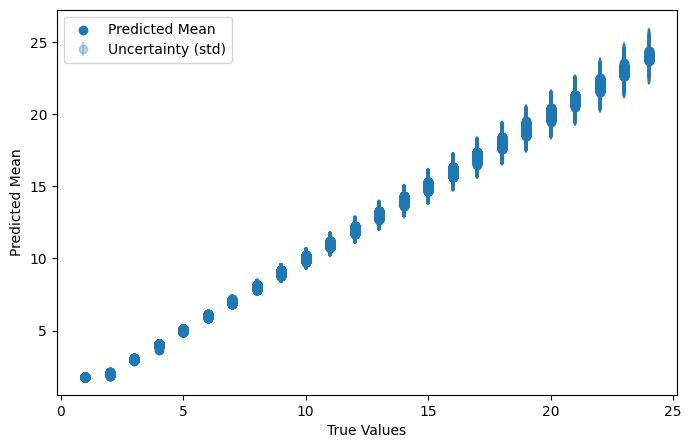

In [23]:
#Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(y_val_tf, pred_mean, label='Predicted Mean')
plt.errorbar(y_val_tf, pred_mean, yerr=pred_std, fmt='o', alpha=0.3, label='Uncertainty (std)')
plt.xlabel('True Values')
plt.ylabel('Predicted Mean')
plt.legend()
plt.show()

In [47]:
# Initialize pred_means as a Python list if not already done
if not isinstance(pred_means, list):
    pred_means = []

y_pred_dist = model(X_val_tf)  # This is a distribution object!
# Now we can append to the list
pred_means.append(tf.reduce_mean(y_pred_dist, axis=-1))

# If you need to convert the list of tensors back to a single tensor later:
# combined_pred_means = tf.concat(pred_means, axis=0)

In [24]:
# Monte Carlo forward passes (Corrected)
num_mc_samples = 100
sample_means = []

for _ in range(num_mc_samples):
    # 1. Calling the model returns the DISTRIBUTION
    y_pred_dist = model(X_val_tf)
    
    # 2. Extract the mean (point prediction) from the distribution
    # Use tf.reduce_mean instead of .mean() for TensorFlow tensors
    sample_means.append(tf.reduce_mean(y_pred_dist, axis=-1))  # Use appropriate axis based on your tensor shape

# Stack all the predicted means from the 100 MC runs
sample_means = tf.stack(sample_means, axis=0) # Shape: [100, N_data, 1]

# FINAL RESULTS:
# The overall prediction mean is the average of the 100 means
pred_mean = tf.reduce_mean(sample_means, axis=0)
# The overall uncertainty (std) is the standard deviation across the 100 means
pred_std = tf.math.reduce_std(sample_means, axis=0)

In [25]:
# Convert Tensors to NumPy for easy comparison (assuming you have already run the corrected prediction code)
y_val_np = y_val_tf.numpy()
pred_mean_np = pred_mean.numpy()
pred_std_np = pred_std.numpy()

# Define the 1-sigma bounds
lower_bound = pred_mean_np - pred_std_np
upper_bound = pred_mean_np + pred_std_np

# Check how many true values fall within the bounds
is_covered = (y_val_np >= lower_bound) & (y_val_np <= upper_bound)

# Calculate the coverage percentage
coverage_percentage = (np.sum(is_covered) / len(y_val_np)) * 100.0

print(f"1-Sigma Coverage Percentage (Probabilistic Accuracy): {coverage_percentage:.2f}%")

1-Sigma Coverage Percentage (Probabilistic Accuracy): 91.63%


In [1]:
model.save("model_bnn.keras")

NameError: name 'model' is not defined

In [28]:
'''from fastapi import FastAPI
from pydantic import BaseModel
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np

# Load your BNN model
model = tf.keras.models.load_model("model_bnn.keras", 
    custom_objects={'DenseFlipout': tfp.layers.DenseFlipout})

app = FastAPI(title="Bayesian Neural Network API")

class InputData(BaseModel):
    features: list  # e.g., [1.2, 3.4, 5.6, ...]

@app.post("/predict")
def predict(data: InputData):
    X = np.array(data.features).reshape(1, -1)
    
    # Monte Carlo sampling for predictive uncertainty
    num_samples = 50
    preds = np.array([model(X) for _ in range(num_samples)])
    
    mean_pred = preds.mean()
    std_pred = preds.std()

    return {
        "mean_prediction": float(mean_pred),
        "uncertainty": float(std_pred)
    }
'''

'from fastapi import FastAPI\nfrom pydantic import BaseModel\nimport tensorflow as tf\nimport tensorflow_probability as tfp\nimport numpy as np\n\n# Load your BNN model\nmodel = tf.keras.models.load_model("model_bnn.keras", \n    custom_objects={\'DenseFlipout\': tfp.layers.DenseFlipout})\n\napp = FastAPI(title="Bayesian Neural Network API")\n\nclass InputData(BaseModel):\n    features: list  # e.g., [1.2, 3.4, 5.6, ...]\n\n@app.post("/predict")\ndef predict(data: InputData):\n    X = np.array(data.features).reshape(1, -1)\n\n    # Monte Carlo sampling for predictive uncertainty\n    num_samples = 50\n    preds = np.array([model(X) for _ in range(num_samples)])\n\n    mean_pred = preds.mean()\n    std_pred = preds.std()\n\n    return {\n        "mean_prediction": float(mean_pred),\n        "uncertainty": float(std_pred)\n    }\n'